# Introduction to Notebooks

In a Jupyter notebook, we have individual cells, which can be either code cells or markdown cells. 

The heading and this text are both examples of markdown cells.

Let's have a code cell where we import some of the packages we would like to use:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dataclasses import dataclass
import random
 
from typing import List

Now that the code has been imported, we can use it in future cells. The Python interpreter that runs in the background keeps track of all the different cells that have been run.

This is similar to the Python REPL (Read-Evaluate-Print loop) that you might have used by typing `python` or `ipython` at the command line, or using a tool such as Spyder.

In [2]:
# This will get us in trouble later
N_SIDES = 6

In [3]:
# We can now define a function in here, that can be used in future cells
def roll_n_dice(n_dice: int) -> int:
    """Rolls N six-sided die and returns the total rolled"""
    # Warning -- this will lead us into danger!
    rolls = [random.randint(1, N_SIDES) for _ in range(n_dice)]
    return sum(rolls)

### Printing in Jupyter notebooks

In [4]:
# We can show the function from a previous cell is remembered.
# Note that the last value in a cell is printed out, if it is not assigned to a variable
roll_n_dice(2)

4

In [5]:
# If we want to supress this behaviour, we can add a semi-colon
roll_n_dice(2);

In [6]:
# this won't print out, because the value is stored in a variable
result_of_roll = roll_n_dice(2)

In [7]:
# but we can "evaluate" the answer
result_of_roll

10

In [8]:
# or we can just print it, the way the programming gods intended
print(result_of_roll)

10


In [9]:
# It is usually better to explicitly print, rather than rely on the odd behavior of the last  executed statement.
# "Explicit is better than implicit!"
# Note this is only printed once
result_of_roll
result_of_roll

10

In [10]:
# but by being explicit, it is easier to predict what we get from running a cell
print(result_of_roll)
print(result_of_roll)

10
10


One of the things that Jupyter notebooks allow us to do really well is quickly visualize the result of our code. This example is a little bit contrived, but we can ask "what are the most common number that occurs if you roll two dice?"

Of course, the avid Euro-gamers among you already know the answer is 7 =)

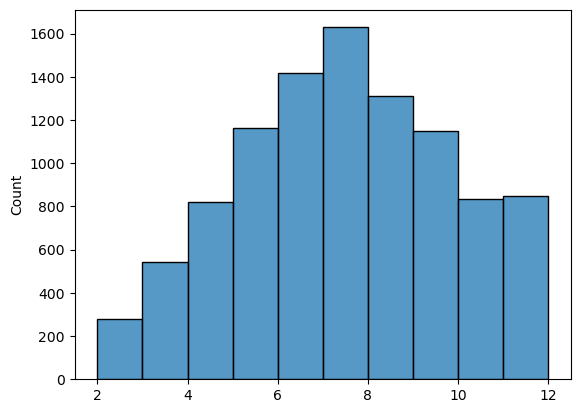

In [11]:
# simulate rolling many times 
many_rolls = [roll_n_dice(n_dice=2) for _ in range(10000)]
sns.histplot(many_rolls, binwidth=1);  # we want the plot, which the function prints, but to ignore some noisey output

Let's suppose we were making a game of our own that is based on die rolls.

We might be curious if rolling 20 6-sided die, and 6 20-sided die in terms of results of the rolls. Can we just swap them interchangably?

<Axes: ylabel='Count'>

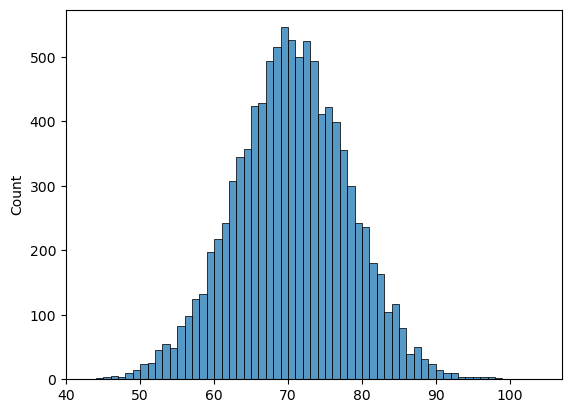

In [12]:
outcomes_roll_20_six_sided_dice = [
    roll_n_dice(n_dice=20) for _ in range(10000)
]
sns.histplot(outcomes_roll_20_six_sided_dice, binwidth=1)

<Axes: ylabel='Count'>

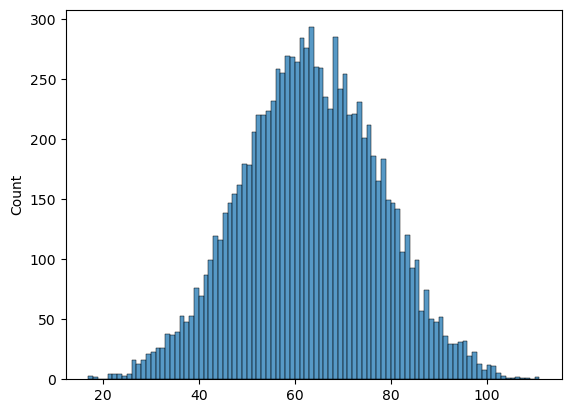

In [13]:
N_SIDES=20   # change to 20 sided dice

outcomes_roll_6_twenty_sided_dice = [
    roll_n_dice(n_dice=6) for _ in range(10000)
]
sns.histplot(outcomes_roll_6_twenty_sided_dice, binwidth=1)

We can compare these on the same axis:

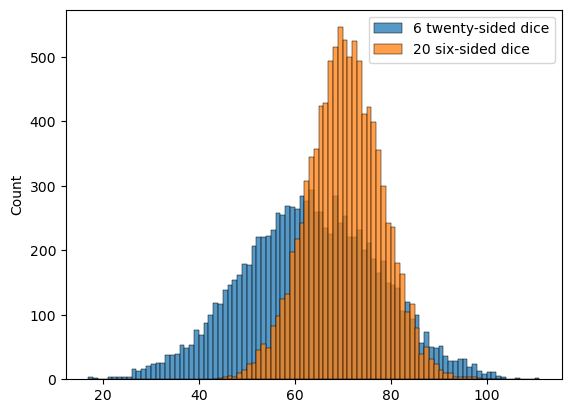

In [14]:
sns.histplot(outcomes_roll_6_twenty_sided_dice, binwidth=1, label="6 twenty-sided dice")
sns.histplot(outcomes_roll_20_six_sided_dice, binwidth=1, label="20 six-sided dice")
plt.legend()

It may have seemed reasonable that 6 twenty-sided dice were "the same" in terms of outcome, and just less annoying, than 20 six-sided dice but we see through simulation the results are actually quite different. Rolling more dice leads to a higher average and results that are less spread out. 

(Your statistics professor would probably tell you something about the central limit theorem .... whatever that is)

### Dangers!

There is a significant problem with the code that we have.

If you go back and re-run `In[4]`, you will actually be rolling 20-sided dice, even though reading the code from top-to-bottom you would assume that we were rolling 6-sided dice!

Even worse, we can delete the cell `In[2]` and the code will still remember the variable `N_SIDES` exists and is currently 20. Everything will work until you reload the notebook, and you'll get q `N_SIDES` not defined.

In part, this is a problem with using a global variable inside a function, instead of passing in the variable. A better way of writing our die rolling function would be

In [15]:
def roll_n_dice(n_dice: int, n_sides: int=6) -> int:
    """Rolls n_dice dice, each die has n_sides, and returns the total"""
    rolls = [random.randint(1, n_sides) for _ in range(n_dice)]
    return sum(rolls)

As a benefit, our code is a lot more explicit when asking what the difference is:

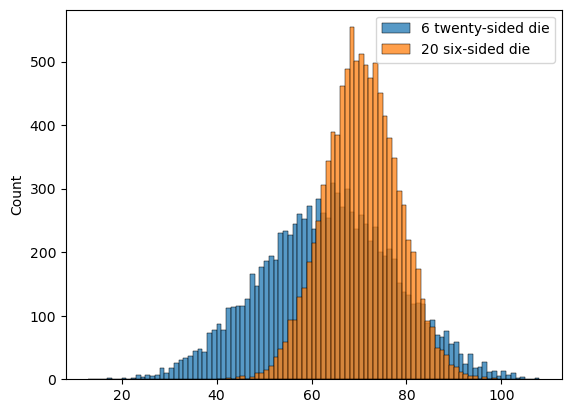

In [17]:
outcomes_roll_20_six_sided_dice = [
    roll_n_dice(n_dice=20, n_sides=6) for _ in range(10000)
]
outcomes_roll_6_twenty_sided_dice = [
    roll_n_dice(n_dice=6, n_sides=20) for _ in range(10000)
]

sns.histplot(outcomes_roll_6_twenty_sided_dice, binwidth=1, label="6 twenty-sided die")
sns.histplot(outcomes_roll_20_six_sided_dice, binwidth=1, label="20 six-sided die")
plt.legend();

Great -- we made our code better.

Better. **But it still has problems**

If you go back to cell `In[13]` we change the global variable `N_SIDES=20` which -- when executing from top to bottom -- changed how many sides were used. Now we have redefined the function `roll_n_dice`, so it ignores `N_SIDES`. 

The function will now act differently.

One way of "fixing" this would be to make `n_sides` not use a default argument at all, and then use partial function application to make a function specifically for rolling 6 sided dice. If we did this, re-running `In[13]` would have an error (because now `roll_n_dice` needs two arguments and we only gave it one). 

But getting an error at least alerts you that something changed. Rerunning cell `In[13]` now will give an answer, but it won't actually represent what it used to mean.

### Biggest problem of Jupyter notebook

The biggest problem with Jupyter notebooks is that each cell changes the notebook's state. The code runs based on the current state of the notebook, which you cannot necessarily get from reading the code.

For example, we might miss that we are using `plt.legend()` calls, and think almost all of the plotting is happening in seaborn. If we remove the line
```
import matplotlib.pyplot as plt
```
the code will run until we restart the notebook -- the notebook's STATE still has this module imported, even though this is no longer represented in the code. It won't be until we restart the notebook, or save it and send it to someone else to run, that this problem will be found.

A suggestion is to use `Kernel > Restart Kernel and Run All` as a way of forcing the notebook to clear its state and run top-to-bottom, to check the notebook still runs.